# Nursery Scenario

Number of Omega-automaton states (including the trap state): 47


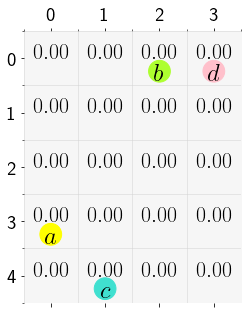

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np 

# LTL Specification
ltl = ('G ('
    '(!d) & '
    '((b & (!(X b)))->(X ((!b) U (a|c)))) & '
    '(((!b) & (X b) & (!(X X b)))->((!a) U c)) & '
    '(a->(X ((!a) U b))) & '
    '(c->((!a) U b)) & '
    '((b & (X b))->(F a))'
')')

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (5,4)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E']
])

# Labels of the states
label = np.array([
[(),    (),    ('b',),('d',)],
[(),    (),    (),    ()],
[(),    (),    (),    ()],
[('a',),(),    (),    ()],
[(),    ('c',),(),    ()]
],dtype=np.object)
# Colors of the labels
lcmap={
    ('a',):'yellow',
    ('b',):'greenyellow',
    ('c',):'turquoise',
    ('d',):'pink'
}
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,lcmap=lcmap,figsize=5)  # Use figsize=4 for smaller figures
grid_mdp.plot()

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [2]:
Q=csrl.q_learning(start=(4,1),T=1000,K=100000)

In [3]:
value=np.max(Q,axis=4)
csrl.plot(value)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=46),…

In [4]:
policy=np.argmax(Q,axis=4)
csrl.plot(value,policy)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=46),…

In [5]:
episode=csrl.simulate(policy,start=(4,1),T=1000,plot=False)
elements, counts = np.unique(np.array(episode)[:,1], return_counts=True)
sorted(zip(elements,counts),key=lambda x:-x[1])

[(41, 476),
 (2, 306),
 (9, 62),
 (18, 55),
 (1, 54),
 (12, 31),
 (11, 7),
 (13, 6),
 (8, 3),
 (0, 1)]

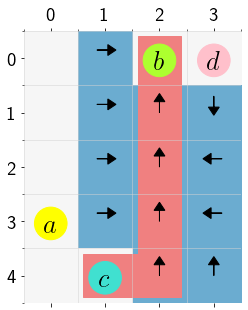

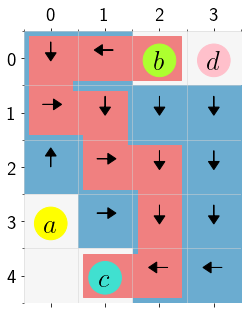

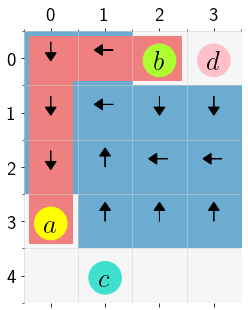

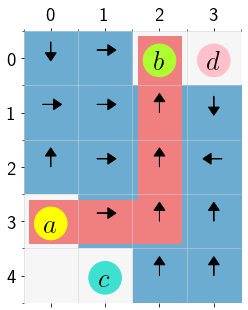

In [6]:
# Plot the important parts of the policy

policy=np.argmax(Q,axis=4)

hidden = [(0,0),(1,0),(2,0),(3,0),(4,0),(4,1),(0,2),(0,3)]
path = {
    (4,1) : 'r',
    (4,2) : 'lu',
    (3,2) : 'du',
    (2,2) : 'du',
    (1,2) : 'du',
    (0,2) : 'd'
}
csrl.plot(value,policy,iq=(0,2),save='nursery_scenario_policy_cb.pdf',path=path,hidden=hidden)


hidden = [(3,0),(4,0),(4,1),(0,2),(0,3)]
path = {
    (0,2) : 'l',
    (0,1) : 'lr',
    (0,0) : 'rd',
    (1,0) : 'ur',
    (1,1) : 'ld',
    (2,1) : 'ur',
    (2,2) : 'ld',
    (3,2) : 'ud',
    (4,2) : 'ul',
    (4,1) : 'r'
}
csrl.plot(value,policy,iq=(0,41),save='nursery_scenario_policy_bc.pdf',hidden=hidden,path=path)

hidden=[(3,0),(4,0),(4,1),(4,2),(4,3),(0,2),(0,3)]
path = {
    (0,2) : 'l',
    (0,1) : 'lr',
    (0,0) : 'rd',
    (1,0) : 'ud',
    (2,0) : 'ud',
    (3,0) : 'u'
}
csrl.plot(value,policy,iq=(0,12),save='nursery_scenario_policy_ba.pdf',hidden=hidden,path=path)

hidden=[(3,0),(4,0),(0,2),(0,3),(4,1)]
path = {
    (3,0) : 'r',
    (3,1) : 'lr',
    (3,2) : 'lu',
    (2,2) : 'du',
    (1,2) : 'du',
    (0,2) : 'd'
}
csrl.plot(value,policy,iq=(0,9),save='nursery_scenario_policy_ab.pdf',hidden=hidden,path=path)

In [7]:
# Save the animation
episode=csrl.simulate(policy,start=(4,1),T=200, animation='test')

interactive(children=(IntSlider(value=0, description='t', max=199), Output()), _dom_classes=('widget-interact'…